ПОЛНЫЙ АНАЛИЗ НЕЙРОННЫХ СЕТЕЙ НА ДАННЫХ HAR
Загружено данных: (4024, 159)
Данные подготовлены: train (2816, 55), test (1208, 55)

ОБУЧЕНИЕ PERCEPTRON
Точность базового Perceptron: 0.9942
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       410
           B       1.00      0.98      0.99       270
           C       0.87      1.00      0.93        34
           D       1.00      0.99      0.99        83
           E       1.00      1.00      1.00       411

    accuracy                           0.99      1208
   macro avg       0.97      0.99      0.98      1208
weighted avg       0.99      0.99      0.99      1208


ОБУЧЕНИЕ MLPCLASSIFIER
Точность базового MLPClassifier: 0.9983
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       410
           B       1.00      1.00      1.00       270
           C       0.97      1.00      0.99        34
           D       1.00      0.99      0.99

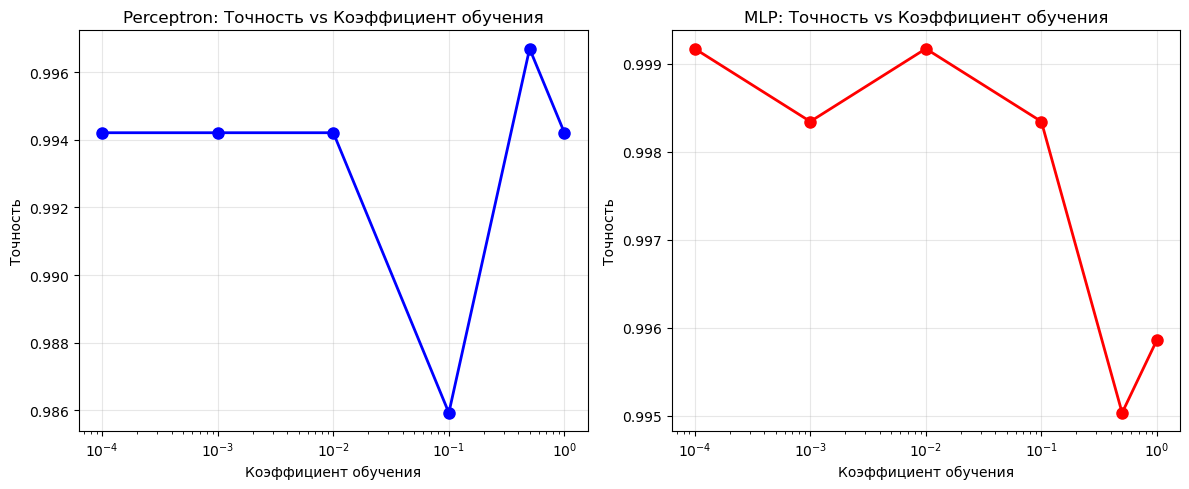


ЭКСПЕРИМЕНТ: ПАРАМЕТР РЕГУЛЯРИЗАЦИИ
MLPClassifier с разной регуляризацией:
  alpha=0.0001: 0.9983
  alpha=0.001: 0.9983
  alpha=0.01: 0.9983
  alpha=0.1: 1.0000
  alpha=1.0: 0.9975
  alpha=10.0: 0.9156


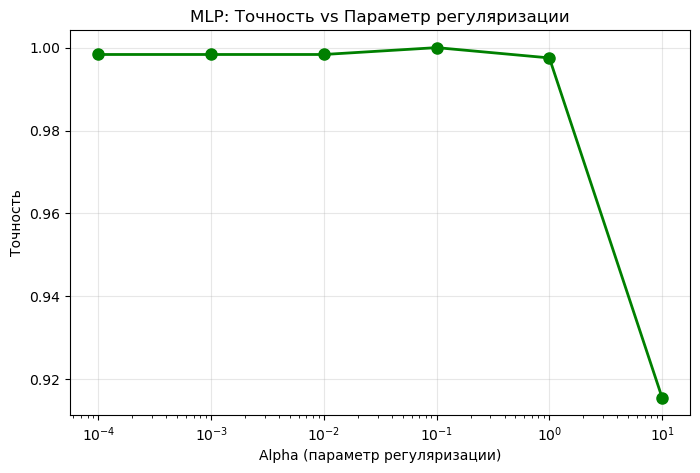


ЭКСПЕРИМЕНТ: АЛГОРИТМЫ ОПТИМИЗАЦИИ
MLPClassifier с разными оптимизаторами:
  solver=lbfgs: 0.9983
  solver=sgd: 0.9934
  solver=adam: 0.9983


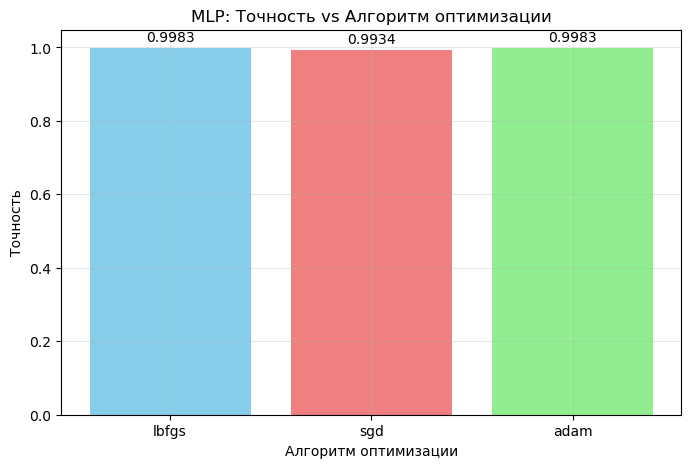


ФИНАЛЬНЫЕ МОДЕЛИ С ЛУЧШИМИ ПАРАМЕТРАМИ
Лучшие параметры Perceptron: learning_rate=0.5
Финальная точность Perceptron: 0.9967
Лучшие параметры MLP: learning_rate=0.0001, alpha=0.1, solver=lbfgs
Финальная точность MLP: 0.9992

ИТОГОВЫЕ РЕЗУЛЬТАТЫ


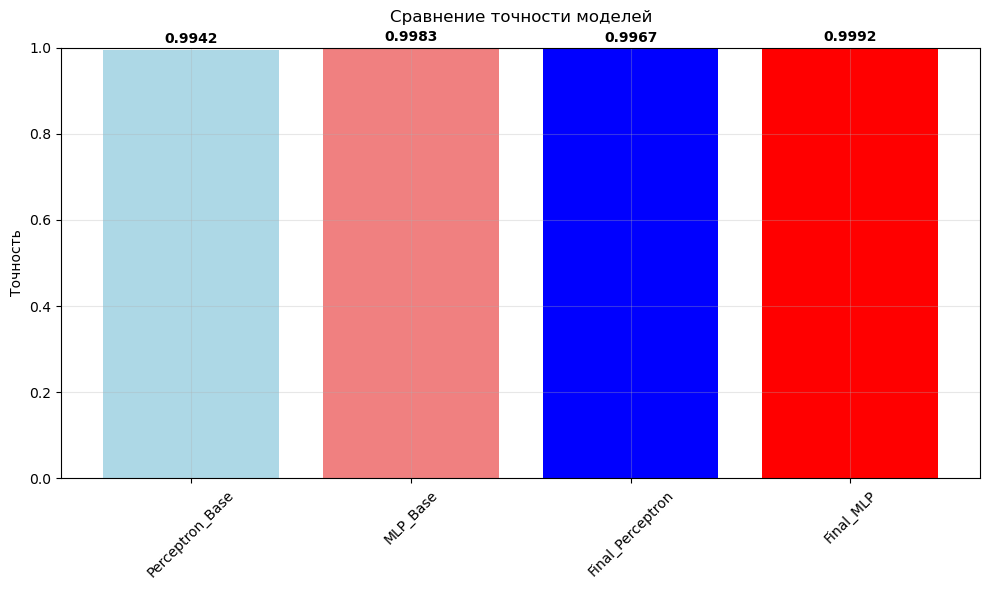


ЛУЧШИЕ ПАРАМЕТРЫ:
  learning_rate: {'Perceptron': 0.5, 'MLP': 0.0001}
  regularization: 0.1
  optimizer: lbfgs


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

class HARNeuralNetworkAnalysis:
    def __init__(self):
        self.results = {}
        self.best_params = {}
    
    def load_and_preprocess_data(self):
        """1. Загрузка и предобработка данных с масштабированием"""
        try:
            # Загрузка данных
            data = pd.read_csv('Example_WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv', 
                             na_values=['', 'NA', 'N/A', '#DIV/0!', ' '],
                             skipinitialspace=True,
                             skiprows=1)
            
            print(f"Загружено данных: {data.shape}")
            
            # Поиск целевой переменной
            target_col = None
            for col in data.columns:
                if 'classe' in col.lower():
                    target_col = col
                    break
            
            if target_col is None:
                print("Целевая переменная не найдена!")
                return None, None, None, None
            
            # Предобработка
            df = data.copy()
            
            # Удаление столбцов с >70% пропусков
            cols_to_drop = [col for col in df.columns if col != target_col and df[col].isna().mean() > 0.7]
            df = df.drop(columns=cols_to_drop)
            
            # Выделение признаков и целевой переменной
            X = df.drop(target_col, axis=1)
            y = df[target_col]
            
            # Только числовые признаки
            numeric_cols = X.select_dtypes(include=[np.number]).columns
            X = X[numeric_cols]
            
            # Заполнение пропусков
            imputer = SimpleImputer(strategy='median')
            X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
            
            # МАСШТАБИРОВАНИЕ ПРИЗНАКОВ - КРИТЕРИЙ 1
            self.scaler = StandardScaler()
            X_scaled = self.scaler.fit_transform(X)
            
            # Разделение на train/test
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y, test_size=0.3, random_state=42, stratify=y
            )
            
            print(f"Данные подготовлены: train {X_train.shape}, test {X_test.shape}")
            return X_train, X_test, y_train, y_test
            
        except Exception as e:
            print(f"Ошибка загрузки: {e}")
            return None, None, None, None
    
    def train_perceptron(self, X_train, X_test, y_train, y_test):
        """2. Обучение Perceptron - КРИТЕРИЙ 2"""
        print("\n" + "="*60)
        print("ОБУЧЕНИЕ PERCEPTRON")
        print("="*60)
        
        # Базовая модель
        perceptron = Perceptron(max_iter=1000, random_state=42)
        perceptron.fit(X_train, y_train)
        
        # 3. ПРОВЕРКА ТОЧНОСТИ - КРИТЕРИЙ 3
        y_pred = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        self.results['Perceptron_Base'] = accuracy
        print(f"Точность базового Perceptron: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        
        return accuracy
    
    def train_mlp_classifier(self, X_train, X_test, y_train, y_test):
        """2. Обучение MLPClassifier - КРИТЕРИЙ 2"""
        print("\n" + "="*60)
        print("ОБУЧЕНИЕ MLPCLASSIFIER")
        print("="*60)
        
        # Базовая модель
        mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
        mlp.fit(X_train, y_train)
        
        # 3. ПРОВЕРКА ТОЧНОСТИ - КРИТЕРИЙ 3
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        self.results['MLP_Base'] = accuracy
        print(f"Точность базового MLPClassifier: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        
        return accuracy
    
    def experiment_learning_rates(self, X_train, X_test, y_train, y_test):
        """4. Эксперименты с коэффициентом обучения - КРИТЕРИЙ 4"""
        print("\n" + "="*60)
        print("ЭКСПЕРИМЕНТ: КОЭФФИЦИЕНТ ОБУЧЕНИЯ")
        print("="*60)
        
        learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
        perceptron_acc = []
        mlp_acc = []
        
        print("Perceptron:")
        for lr in learning_rates:
            model = Perceptron(eta0=lr, max_iter=1000, random_state=42)
            model.fit(X_train, y_train)
            acc = accuracy_score(y_test, model.predict(X_test))
            perceptron_acc.append(acc)
            print(f"  lr={lr}: {acc:.4f}")
            self.results[f'Perceptron_lr_{lr}'] = acc
        
        print("\nMLPClassifier:")
        for lr in learning_rates:
            model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=lr, 
                                max_iter=500, random_state=42)
            model.fit(X_train, y_train)
            acc = accuracy_score(y_test, model.predict(X_test))
            mlp_acc.append(acc)
            print(f"  lr={lr}: {acc:.4f}")
            self.results[f'MLP_lr_{lr}'] = acc
        
        # Визуализация
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.semilogx(learning_rates, perceptron_acc, 'bo-', linewidth=2, markersize=8)
        plt.title('Perceptron: Точность vs Коэффициент обучения')
        plt.xlabel('Коэффициент обучения')
        plt.ylabel('Точность')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.semilogx(learning_rates, mlp_acc, 'ro-', linewidth=2, markersize=8)
        plt.title('MLP: Точность vs Коэффициент обучения')
        plt.xlabel('Коэффициент обучения')
        plt.ylabel('Точность')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Лучшие параметры
        best_perceptron_lr = learning_rates[np.argmax(perceptron_acc)]
        best_mlp_lr = learning_rates[np.argmax(mlp_acc)]
        self.best_params['learning_rate'] = {
            'Perceptron': best_perceptron_lr,
            'MLP': best_mlp_lr
        }
        
        return best_perceptron_lr, best_mlp_lr
    
    def experiment_regularization(self, X_train, X_test, y_train, y_test):
        """4. Эксперименты с параметром регуляризации - КРИТЕРИЙ 4"""
        print("\n" + "="*60)
        print("ЭКСПЕРИМЕНТ: ПАРАМЕТР РЕГУЛЯРИЗАЦИИ")
        print("="*60)
        
        alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
        mlp_alpha_acc = []
        
        print("MLPClassifier с разной регуляризацией:")
        for alpha in alphas:
            model = MLPClassifier(hidden_layer_sizes=(100,), alpha=alpha, 
                                max_iter=500, random_state=42)
            model.fit(X_train, y_train)
            acc = accuracy_score(y_test, model.predict(X_test))
            mlp_alpha_acc.append(acc)
            print(f"  alpha={alpha}: {acc:.4f}")
            self.results[f'MLP_alpha_{alpha}'] = acc
        
        # Визуализация
        plt.figure(figsize=(8, 5))
        plt.semilogx(alphas, mlp_alpha_acc, 'go-', linewidth=2, markersize=8)
        plt.title('MLP: Точность vs Параметр регуляризации')
        plt.xlabel('Alpha (параметр регуляризации)')
        plt.ylabel('Точность')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        best_alpha = alphas[np.argmax(mlp_alpha_acc)]
        self.best_params['regularization'] = best_alpha
        
        return best_alpha
    
    def experiment_optimizers(self, X_train, X_test, y_train, y_test):
        """4. Эксперименты с функциями оптимизации - КРИТЕРИЙ 4"""
        print("\n" + "="*60)
        print("ЭКСПЕРИМЕНТ: АЛГОРИТМЫ ОПТИМИЗАЦИИ")
        print("="*60)
        
        solvers = ['lbfgs', 'sgd', 'adam']
        mlp_solver_acc = []
        
        print("MLPClassifier с разными оптимизаторами:")
        for solver in solvers:
            model = MLPClassifier(hidden_layer_sizes=(100,), solver=solver,
                                max_iter=500, random_state=42)
            model.fit(X_train, y_train)
            acc = accuracy_score(y_test, model.predict(X_test))
            mlp_solver_acc.append(acc)
            print(f"  solver={solver}: {acc:.4f}")
            self.results[f'MLP_solver_{solver}'] = acc
        
        # Визуализация
        plt.figure(figsize=(8, 5))
        plt.bar(solvers, mlp_solver_acc, color=['skyblue', 'lightcoral', 'lightgreen'])
        plt.title('MLP: Точность vs Алгоритм оптимизации')
        plt.xlabel('Алгоритм оптимизации')
        plt.ylabel('Точность')
        plt.grid(True, alpha=0.3)
        
        for i, acc in enumerate(mlp_solver_acc):
            plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom')
        
        plt.show()
        
        best_solver = solvers[np.argmax(mlp_solver_acc)]
        self.best_params['optimizer'] = best_solver
        
        return best_solver
    
    def train_final_models(self, X_train, X_test, y_train, y_test):
        """Обучение финальных моделей с лучшими параметрами"""
        print("\n" + "="*60)
        print("ФИНАЛЬНЫЕ МОДЕЛИ С ЛУЧШИМИ ПАРАМЕТРАМИ")
        print("="*60)
        
        # Лучший Perceptron
        best_lr = self.best_params['learning_rate']['Perceptron']
        final_perceptron = Perceptron(eta0=best_lr, max_iter=1000, random_state=42)
        final_perceptron.fit(X_train, y_train)
        perceptron_acc = accuracy_score(y_test, final_perceptron.predict(X_test))
        
        # Лучший MLP
        best_lr_mlp = self.best_params['learning_rate']['MLP']
        best_alpha = self.best_params['regularization']
        best_solver = self.best_params['optimizer']
        
        final_mlp = MLPClassifier(
            hidden_layer_sizes=(100,),
            learning_rate_init=best_lr_mlp,
            alpha=best_alpha,
            solver=best_solver,
            max_iter=500,
            random_state=42
        )
        final_mlp.fit(X_train, y_train)
        mlp_acc = accuracy_score(y_test, final_mlp.predict(X_test))
        
        print(f"Лучшие параметры Perceptron: learning_rate={best_lr}")
        print(f"Финальная точность Perceptron: {perceptron_acc:.4f}")
        
        print(f"Лучшие параметры MLP: learning_rate={best_lr_mlp}, alpha={best_alpha}, solver={best_solver}")
        print(f"Финальная точность MLP: {mlp_acc:.4f}")
        
        self.results['Final_Perceptron'] = perceptron_acc
        self.results['Final_MLP'] = mlp_acc
        
        return final_perceptron, final_mlp
    
    def visualize_results(self):
        """Визуализация итоговых результатов"""
        print("\n" + "="*60)
        print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
        print("="*60)
        
        # Сравнение моделей
        models = ['Perceptron_Base', 'MLP_Base', 'Final_Perceptron', 'Final_MLP']
        accuracies = [self.results.get(model, 0) for model in models]
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(models, accuracies, color=['lightblue', 'lightcoral', 'blue', 'red'])
        plt.title('Сравнение точности моделей\n')
        plt.ylabel('Точность')
        plt.ylim(0, 1)
        plt.grid(True, alpha=0.3)
        
        for bar, acc in zip(bars, accuracies):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
        
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Вывод лучших параметров
        print("\nЛУЧШИЕ ПАРАМЕТРЫ:")
        for param, value in self.best_params.items():
            print(f"  {param}: {value}")

    def run_complete_analysis(self):
        """Полный анализ данных"""
        print("ПОЛНЫЙ АНАЛИЗ НЕЙРОННЫХ СЕТЕЙ НА ДАННЫХ HAR")
        print("="*60)
        
        # 1. Загрузка и предобработка
        X_train, X_test, y_train, y_test = self.load_and_preprocess_data()
        if X_train is None:
            return
        
        # 2. Обучение базовых моделей
        self.train_perceptron(X_train, X_test, y_train, y_test)
        self.train_mlp_classifier(X_train, X_test, y_train, y_test)
        
        # 4. Эксперименты с параметрами
        self.experiment_learning_rates(X_train, X_test, y_train, y_test)
        self.experiment_regularization(X_train, X_test, y_train, y_test)
        self.experiment_optimizers(X_train, X_test, y_train, y_test)
        
        # Финальные модели
        self.train_final_models(X_train, X_test, y_train, y_test)
        
        # Визуализация результатов
        self.visualize_results()

# Запуск анализа
if __name__ == "__main__":
    analyzer = HARNeuralNetworkAnalysis()
    analyzer.run_complete_analysis()